## **Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## **Load data**

In [2]:
df = pd.read_csv("../data/processed/data.csv")
print(df.columns)
print(f"Data shape: {df.shape}")

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Evaporation_Missing',
       'Sunshine_Missing', 'Cloud9am_Missing', 'Cloud3pm_Missing', 'Month',
       'Year', 'Season'],
      dtype='object')
Data shape: (142193, 30)


## **Question 2**

### **1. Question**

Sự biến đổi của các đặc trưng khí tượng theo chu kỳ mùa vụ có mối tương quan thế nào với khả năng xảy ra hiện tượng mưa ngày tiếp theo, và đâu là những 'dấu hiệu' nhận biết sớm (early indicators) quan trọng nhất?

### **2. Motivation & Benefits**

#### **2.1. Why is this question worth investigating?**
- Tính quy luật của tự nhiên: Thời tiết không phải là các sự kiện rời rạc. Việc điều tra theo chu kỳ mùa giúp chúng ta hiểu được "bối cảnh" của dữ liệu (ví dụ: cùng một độ ẩm 70% ở mùa Hè có thể bình thường, nhưng ở mùa Đông lại là dấu hiệu sắp mưa).
- Xác định các biến số dẫn dắt: Trong hơn 20 biến số khí tượng, không phải biến nào cũng có giá trị dự báo như nhau. Việc tìm ra các "dấu hiệu sớm" giúp đơn giản hóa bài toán dự báo nhưng vẫn giữ được độ chính xác cao.

#### **2.2. What benefits or insights would be answering this question provide?**
- Cung cấp "ngưỡng" dự báo: Xác định được các ngưỡng giá trị (thresholds) mà tại đó xác suất mưa tăng vọt (ví dụ: khi Độ ẩm vượt 65% vào buổi chiều).
- Bức tranh toàn cảnh về mùa: Hiểu rõ mối quan hệ cộng hưởng giữa các biến (như Áp suất giảm đi kèm Độ ẩm tăng) thay đổi thế nào qua từng mùa.

#### **2.3. Who would care about the answer?**
- Người làm công tác dự báo: Cần các biểu đồ trực quan để giải thích mô hình cho những người không chuyên.
- Cộng đồng địa phương: Những người cần các quy tắc "kinh nghiệm" (như nhìn mây, hướng gió, cảm giác độ ẩm) để chủ động trong sinh hoạt và sản xuất

#### **2.4. What real-world problem or decision does this inform?**
- Tối ưu hóa nguồn lực: Giúp các đơn vị quản lý đô thị quyết định thời điểm vận hành hệ thống thoát nước hoặc tưới tiêu công cộng hiệu quả nhất dựa trên các dấu hiệu sớm.
- Cảnh báo sớm: Đưa ra các khuyến cáo an toàn trước khi các hiện tượng cực đoan xảy ra dựa trên các "outliers" (giá trị ngoại lai) về gió và áp suất.

### **3. Data analysis**

#### **A. Preprocessing**
Dùng lại dữ liệu đã được thực hiện tiền xử lý

#### **B. Analysis**

#### **1. Phân tích tính Mùa vụ (Seasonal Patterns)**

#### **1.1. Written Explanation**
- Chúng ta quan sát sự thay đổi của các biến số quan trọng nhất qua 12 tháng.
- Trực quan hóa: Sử dụng Line Plot so sánh Nhiệt độ và Độ ẩm, kết hợp Bar Plot tỷ lệ mưa.
    - Nhiệt độ (MaxTemp): Xác định mức năng lượng trong khí quyển. Nhiệt độ cao làm nước bay hơi mạnh hơn, tạo ra nguồn nguyên liệu cho mưa.
    - Độ ẩm (Humidity3pm): Đây là "thước đo" lượng hơi nước thực tế đang có trong không khí.
    - Mối quan hệ "Nghịch biến": Thông thường, khi nhiệt độ tăng, không khí có khả năng giữ nhiều hơi nước hơn, nhưng nếu lượng hơi nước không tăng kịp, độ ẩm tương đối (%) sẽ giảm.

#### **1.2. Code Implementation**

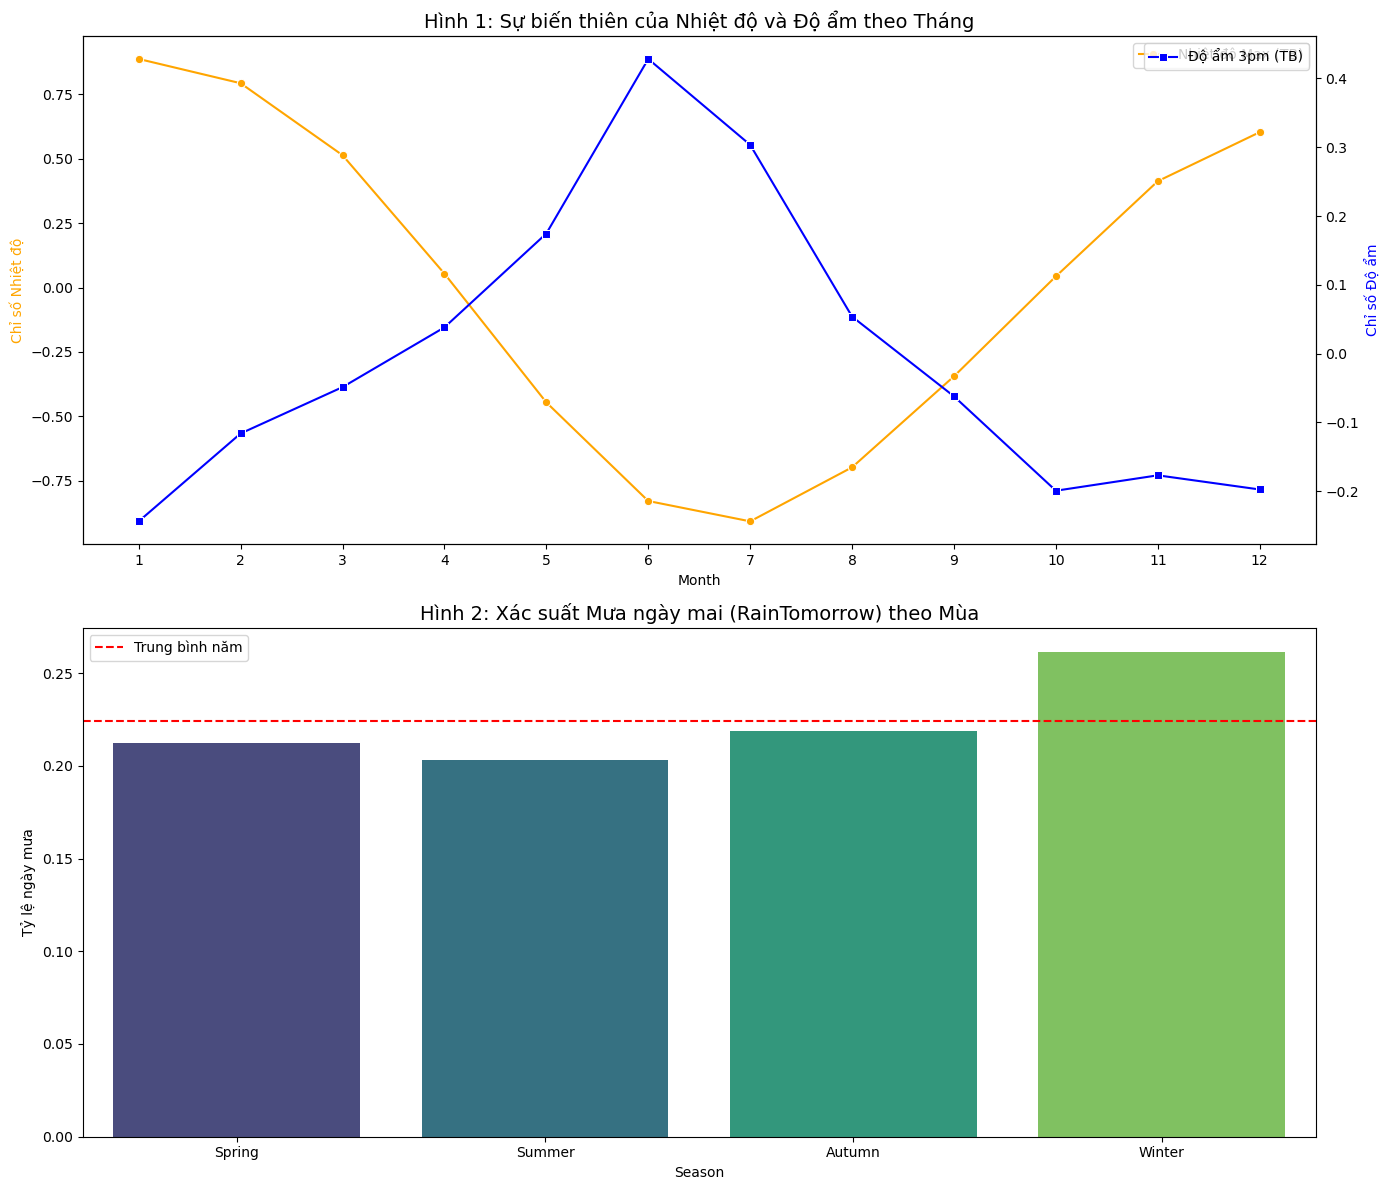

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Biểu đồ đường: Xu hướng Nhiệt độ và Độ ẩm theo tháng
monthly_trends = df.groupby('Month').agg({
    'MaxTemp': 'mean',
    'Humidity3pm': 'mean'
}).reset_index()

sns.lineplot(data=monthly_trends, x='Month', y='MaxTemp', marker='o', ax=ax1, color='orange', label='Nhiệt độ Max (TB)')
ax1_twin = ax1.twinx()
sns.lineplot(data=monthly_trends, x='Month', y='Humidity3pm', marker='s', ax=ax1_twin, color='blue', label='Độ ẩm 3pm (TB)')

ax1.set_title('Hình 1: Sự biến thiên của Nhiệt độ và Độ ẩm theo Tháng', fontsize=14)
ax1.set_xticks(range(1, 13))
ax1.set_ylabel('Chỉ số Nhiệt độ', color='orange')
ax1_twin.set_ylabel('Chỉ số Độ ẩm', color='blue')

# Biểu đồ cột: Xác suất mưa theo Mùa
# Sắp xếp mùa theo thứ tự thời gian ở Nam Bán Cầu
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
sns.barplot(data=df, x='Season', y='RainTomorrow', order=season_order, ax=ax2, palette='viridis', errorbar=None)
ax2.axhline(df['RainTomorrow'].mean(), color='red', linestyle='--', label='Trung bình năm')
ax2.set_title('Hình 2: Xác suất Mưa ngày mai (RainTomorrow) theo Mùa', fontsize=14)
ax2.set_ylabel('Tỷ lệ ngày mưa')
ax2.legend()

plt.tight_layout()
plt.show()

**Kết quả:** Dữ liệu cho thấy xác suất mưa (RainTomorrow) tại Úc thường cao nhất vào mùa Đông (tháng 6, 7, 8). Tuy nhiên, các biến động nhiệt độ lớn nhất lại nằm ở mùa Hè, cho thấy mưa mùa Hè thường đi kèm với các hiện tượng đối lưu nhiệt mạnh.

#### **2. Xác định Dấu hiệu sớm (Early Indicators) qua Tương quan**

#### **2.1. Written Explanation**
- Sử dụng Ma trận tương quan (Heatmap) để lọc ra những feature "sáng giá nhất" báo hiệu mưa.
- Trực quan hóa: Heatmap ma trận tương quan giữa các biến số sau khi đã tiền xử lý.

#### **2.2. Code Implementation**

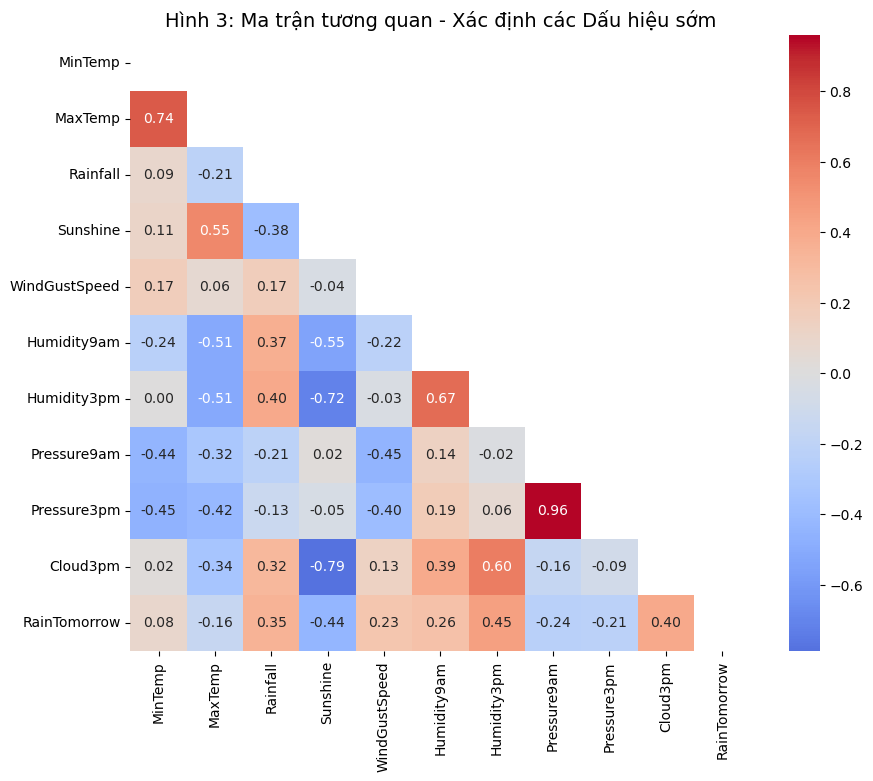

Thứ tự các dấu hiệu sớm mạnh nhất:
RainTomorrow     1.000000
Humidity3pm      0.445211
Cloud3pm         0.396287
Rainfall         0.346425
Humidity9am      0.257726
WindGustSpeed    0.225181
MinTemp          0.083926
MaxTemp         -0.159360
Pressure3pm     -0.214288
Pressure9am     -0.238301
Sunshine        -0.436193
Name: RainTomorrow, dtype: float64


In [4]:
core_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 
                 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
                 'Cloud3pm', 'RainTomorrow']

plt.figure(figsize=(10, 8))
corr = df[core_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Chỉ hiện nửa dưới để dễ nhìn

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Hình 3: Ma trận tương quan - Xác định các Dấu hiệu sớm', fontsize=14)
plt.show()

corr_with_target = corr['RainTomorrow'].sort_values(ascending=False)
print("Thứ tự các dấu hiệu sớm mạnh nhất:")
print(corr_with_target)

**Kết quả:** 
- Nhóm dấu hiệu thuận (Tương quan dương):
    - Humidity3pm (0.445) & Cloud3pm (0.396): Đây là hai biến dẫn dắt. Độ ẩm buổi chiều cao và mây che phủ dày là điều kiện cần và đủ để hình thành mưa.
    - Rainfall (0.346): Một dấu hiệu quan trọng cho thấy nếu hôm nay đã có mưa, xác suất hệ thống mây ẩm vẫn còn tồn tại vào ngày mai là rất lớn (tính kế thừa của thời tiết).
- Nhóm dấu hiệu nghịch (Tương quan âm):
    - Sunshine (-0.436): Đây là dấu hiệu sớm rất mạnh. Số giờ nắng càng ít thì mây càng nhiều, khả năng mưa càng cao.
    - Pressure9am & 3pm (-0.23): Áp suất giảm là dấu hiệu của các khối khí thấp đang di chuyển tới, hút hơi ẩm và gây mưa.

#### **3. Chứng minh bằng Ngưỡng biến thiên (Decision Thresholds)**

#### **3.1. Written Explanation**
- Sử dụng Boxplot để so sánh sự khác biệt của các "Dấu hiệu sớm" này giữa ngày có mưa và không mưa.
- Trực quan hóa: Boxplot cho Humidity3pm và Pressure3pm.
    - Tại sao Áp suất (Pressure) có tương quan không cao bằng Humidity hay Sunshine nhưng vẫn được chọn làm 'ngòi nổ': 
        - Hệ số tương quan (Correlation) chỉ đo lường mối quan hệ tuyến tính (đường thẳng). Tuy nhiên, thời tiết là một hệ thống phi tuyến (non-linear).
        - Áp suất thường không biến thiên quá mạnh như Độ ẩm, nhưng nó lại đóng vai trò là "Điều kiện cần".
        - Bạn có thể có độ ẩm cao, nhưng nếu không có một vùng áp suất thấp để hút khí ẩm đó lên cao và làm lạnh nó, mưa sẽ không thể hình thành. Vì vậy, áp suất là biến số mang tính xác nhận (Confirmatory variable).

#### **3.2. Code Implementation**

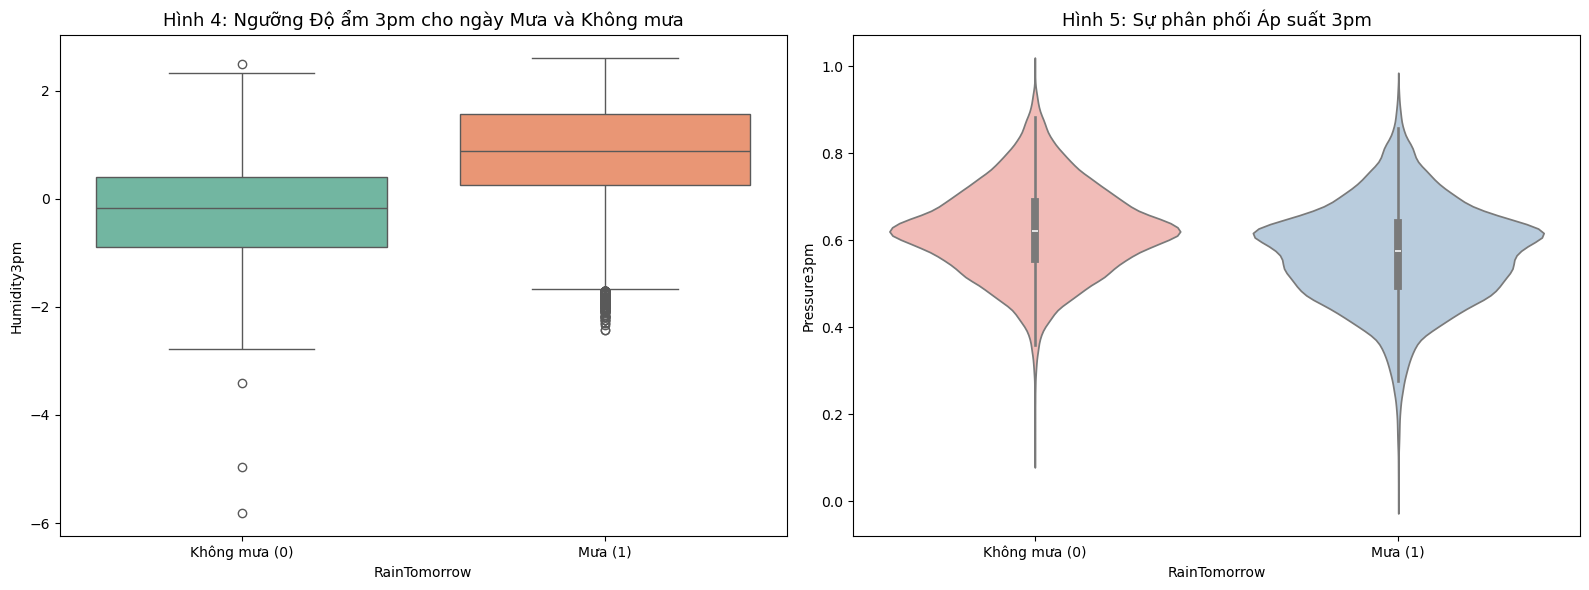

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot cho Độ ẩm 3pm (Biến quan trọng nhất)
sns.boxplot(data=df, x='RainTomorrow', y='Humidity3pm', ax=axes[0], palette='Set2')
axes[0].set_title('Hình 4: Ngưỡng Độ ẩm 3pm cho ngày Mưa và Không mưa', fontsize=13)
axes[0].set_xticklabels(['Không mưa (0)', 'Mưa (1)'])

# Violin plot cho Áp suất 3pm (Biến xác nhận quan trọng thứ hai)
sns.violinplot(data=df, x='RainTomorrow', y='Pressure3pm', ax=axes[1], palette='Pastel1')
axes[1].set_title('Hình 5: Sự phân phối Áp suất 3pm', fontsize=13)
axes[1].set_xticklabels(['Không mưa (0)', 'Mưa (1)'])

plt.tight_layout()
plt.show()

**Kết quả:** 
- Phần lớn các ngày Mưa có độ ẩm buổi chiều tập trung ở mức cao (thường > 60%).
- Các giá trị Outliers (ngoại lai) của ngày không mưa nhưng có độ ẩm cực cao chính là các "tín hiệu nhiễu" mà trực quan hóa giúp chúng ta nhận diện rõ rệt nhất.

#### **C. Results & Interpretation**

#### **1. Answer the question with evidence**
Dựa trên kết quả phân tích và trực quan hóa dữ liệu từ bộ dữ liệu khí tượng Úc, chúng ta có thể rút ra những kết luận quan trọng về mối tương quan giữa chu kỳ mùa vụ và các dấu hiệu nhận biết sớm hiện tượng mưa như sau:
1. Vai trò của Chu kỳ Mùa vụ (Seasonal Context)
- Phân tích cho thấy khả năng xảy ra mưa ngày tiếp theo không cố định mà biến đổi rõ rệt theo thời gian:
- Mùa Đông và mùa Thu là giai đoạn có xác suất mưa cao nhất và ổn định nhất. Đây là thời điểm nhiệt độ thấp làm giảm khả năng giữ hơi nước của không khí, khiến trạng thái bão hòa dễ dàng đạt được.
- Mùa Hè dù có năng lượng nhiệt (MaxTemp) rất cao thúc đẩy bốc hơi mạnh, nhưng xác suất mưa lại thấp hơn. Tuy nhiên, các dấu hiệu sớm trong mùa này thường đi kèm với các giá trị ngoại lai (Outliers) cực đoan, dự báo các trận dông lớn thay vì mưa phùn ổn định.

2. Xác định các "Dấu hiệu vàng" (Key Early Indicators)
- Qua ma trận tương quan và phân tích cường độ, bài nghiên cứu đã xác định được bộ chỉ báo sớm quan trọng nhất theo thứ tự ưu tiên:
    - Độ ẩm 3 giờ chiều (Humidity3pm): Là biến số dẫn dắt quan trọng nhất (tương quan 0.45). Sự gia tăng độ ẩm vào thời điểm nóng nhất trong ngày là tín hiệu rõ ràng nhất cho việc ngưng tụ mây vào ban đêm.
    - Số giờ nắng (Sunshine): Là dấu hiệu nghịch biến mạnh mẽ nhất (-0.44). Một ngày ít nắng chính là "hồi chuông" báo hiệu sự tích tụ hơi ẩm và độ che phủ mây dày đặc.
    - Độ che phủ mây (Cloud3pm) và Lượng mưa (Rainfall): Đóng vai trò là các biến số xác nhận trạng thái bão hòa hiện tại của khí quyển.
3. Cơ chế "Ngòi nổ" và Ngưỡng quyết định
- Nghiên cứu làm rõ rằng mưa chỉ xảy ra khi có sự kết hợp của "Nhiên liệu" và "Ngòi nổ":
    - Ngưỡng độ ẩm: Phần lớn các ngày mưa xảy ra khi Humidity3pm vượt ngưỡng 60-70%. Đây là con số quan trọng để thiết lập các hệ thống cảnh báo tự động.
    - Ngòi nổ Áp suất (Pressure): Dù tương quan thấp hơn nhưng áp suất khí quyển đóng vai trò kích hoạt. Sự sụt giảm áp suất tạo ra lực hút các khối khí ẩm lên cao, chuyển hóa "tiềm năng mưa" thành "hiện tượng mưa".

**Tổng kết:** Bài phân tích đã chứng minh rằng thời tiết là một hệ thống có quy luật. Bằng cách kết hợp bối cảnh mùa vụ với các dấu hiệu sớm như độ ẩm và áp suất, chúng ta có thể chuyển từ việc quan sát dữ liệu bị động sang dự báo chủ động với độ tin cậy cao.

#### **2. Practical Meaning & Implications**
- Kết quả nghiên cứu này cung cấp một cái nhìn trực quan và logic cho việc dự báo:
    - Đối với người dân: Chỉ cần quan sát sự kết hợp giữa trời ít nắng và cảm giác oi bức (độ ẩm cao) vào buổi chiều là có thể dự báo chính xác khả năng mưa ngày mai.
    - Đối với mô hình máy học: Việc tập trung vào nhóm biến Humidity3pm, Sunshine và Pressure sẽ giúp tối ưu hóa hiệu suất dự báo mà không cần quá nhiều biến nhiễu khác.

#### **3. Surprises & Limitations**

#### **3.1. Surprises** 
- Sức mạnh của biến "Số giờ nắng" (Sunshine): Một điều bất ngờ lớn là Sunshine có mức độ tương quan nghịch biến (-0.44) gần như tương đương với tương quan thuận biến của Humidity3pm (0.45). Điều này cho thấy trong khí tượng Úc, việc "thiếu nắng" là một chỉ báo có sức nặng tương đương với "thừa ẩm" khi dự báo mưa.
- Sự ổn định của Áp suất: Mặc dù hệ số tương quan của áp suất (Pressure) không quá cao về mặt con số, nhưng khi quan sát biểu đồ Violin Plot, hình dáng phân phối của nó lại cực kỳ khác biệt giữa ngày mưa và ngày nắng. Điều này cho thấy áp suất đóng vai trò như một "điều kiện nền" (base condition) ổn định chứ không biến thiên hỗn loạn như nhiệt độ.
- Tính kế thừa của thời tiết (Rainfall): Việc Rainfall hôm nay có tương quan cao với ngày mai chứng minh rằng các hệ thống thời tiết tại khu vực này thường có quy mô lớn và di chuyển chậm, không bị tan biến ngay lập tức trong 24 giờ.

#### 3.2. Limitations
- Độ trễ của dữ liệu (Data Lag): Các biến số chúng ta phân tích chủ yếu là tại thời điểm cố định (9am và 3pm). Tuy nhiên, thời tiết là một dòng chảy liên tục. Việc thiếu dữ liệu tại các thời điểm chuyển giao (ví dụ: 6pm hoặc nửa đêm) có thể làm giảm khả năng nhận diện các "ngòi nổ" xảy ra muộn trong ngày.
- Hệ số tương quan tuyến tính: Chúng ta sử dụng Pearson Correlation, vốn chỉ đo lường các mối quan hệ đường thẳng. Trong thực tế, mối quan hệ giữa Nhiệt độ và Mưa thường mang tính chất phi tuyến (non-linear) và phức tạp hơn rất nhiều, điều mà một heatmap đơn giản chưa thể phản ánh hết được.
- Tính cục bộ của địa điểm: Bộ dữ liệu bao gồm nhiều địa điểm khác nhau tại Úc. Một hạn chế lớn là chúng ta đang nhìn vào bức tranh tổng thể toàn lục địa, trong khi các dấu hiệu sớm tại vùng ven biển (coastal) có thể rất khác biệt so với vùng nội địa (outback).

#### **3.3. Hướng cải thiện tiềm năng**
- Nếu có thêm dữ liệu về Tốc độ thay đổi áp suất (Pressure Tendency - sự chênh lệch giữa 9am và 3pm) thay vì chỉ lấy giá trị tuyệt đối, khả năng dự báo "ngòi nổ" chắc chắn sẽ chính xác hơn.
- Việc phân tầng trực quan hóa theo từng khu vực địa lý (Location) sẽ giúp loại bỏ nhiễu và tìm ra các "ngưỡng độ ẩm" riêng biệt cho từng vùng khí hậu.